In [ ]:
# for base model, run 20 epochs with 32 batch size
# use early stopping only in tuning, not in base model

# can use tensorboard to view accuracy and loss graphs
from tensorflow.keras.callbacks import TensorBoard
import os

# Change the model name accordingly
log_dir = os.path.join("logs", "fit", "YOUR MODEL")
os.makedirs(log_dir, exist_ok=True) 

tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
base_history = b_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stopping, tensorboard_callback]
)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Define paths
train_dir = 'Dataset_split/train'
test_dir = 'Dataset_split/test'
val_dir = 'Dataset_split/val'

# Data generators
train_data_gen = ImageDataGenerator(
    rescale=1 / 255.0,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

valid_datagen = ImageDataGenerator(
    rescale=1 / 255.0
)

test_data_gen = ImageDataGenerator(
    rescale=1 / 255.0,
)

train_generator = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    color_mode='grayscale',
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    directory=val_dir,
    target_size=(224, 224),
    color_mode="grayscale",
    class_mode="binary",
    batch_size=32,
    shuffle=False
)

test_generator = test_data_gen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    color_mode='grayscale',
    class_mode='binary',
    shuffle=False
)

Found 14000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.
Found 3000 images belonging to 1 classes.


In [8]:
# create model structure
b_model = Sequential()
 
b_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)))
b_model.add(Conv2D(64, (3, 3), activation='relu'))
b_model.add(MaxPooling2D(pool_size=(2, 2)))
b_model.add(Dropout(0.25))
 
b_model.add(Conv2D(128, (3, 3), activation='relu'))
b_model.add(MaxPooling2D(pool_size=(2, 2)))
b_model.add(Conv2D(128, (3, 3), activation='relu'))
b_model.add(MaxPooling2D(pool_size=(2, 2)))
b_model.add(Dropout(0.25))
 
b_model.add(Flatten())
b_model.add(Dense(1024, activation='relu'))
b_model.add(Dropout(0.5))
b_model.add(Dense(1, activation='sigmoid'))
 
optimizer = Adam(learning_rate=0.0001)
b_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
 
b_model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 110, 110, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 52, 52, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    88,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,846,977 (338.92 MB)

 Trainable params: 88,846,977 (338.92 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Add EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
 
# Train the model with early stopping
base_history = b_model.fit(train_generator, validation_data=valid_generator, epochs=50, callbacks=[early_stopping])
 
# Evaluate the model on the test set
test_loss, test_accuracy = b_model.evaluate(test_generator)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1723046899.321433     164 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1723046899.346829     164 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


153/438 ━━━━━━━━━━━━━━━━━━━━ 2:00 422ms/step - accuracy: 0.5309 - loss: 0.7015

W0000 00:00:1723046963.632479     163 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.6080 - loss: 0.6401

W0000 00:00:1723047052.350147     164 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1723047076.722963     165 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


438/438 ━━━━━━━━━━━━━━━━━━━━ 210s 408ms/step - accuracy: 0.6082 - loss: 0.6398 - val_accuracy: 0.9450 - val_loss: 0.2034
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 114s 257ms/step - accuracy: 0.9190 - loss: 0.2032 - val_accuracy: 0.9980 - val_loss: 0.0220
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 116s 260ms/step - accuracy: 0.9760 - loss: 0.0748 - val_accuracy: 0.9987 - val_loss: 0.0103
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 114s 257ms/step - accuracy: 0.9848 - loss: 0.0465 - val_accuracy: 0.9987 - val_loss: 0.0085
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 114s 257ms/step - accuracy: 0.9880 - loss: 0.0364 - val_accuracy: 0.9990 - val_loss: 0.0065
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 114s 257ms/step - accuracy: 0.9912 - loss: 0.0298 - val_accuracy: 0.9993 - val_loss: 0.0039
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 115s 259ms/step - accuracy: 0.9944 - loss: 0.0168 - val_accuracy: 0.9990 - val_loss: 0.0038
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 116s 261ms/step - accuracy: 0.9939 - loss: 0.02

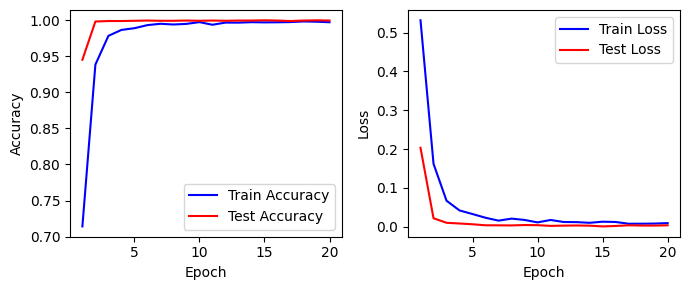

In [14]:

acc = base_history.history['accuracy']
val_acc = base_history.history['val_accuracy']
loss = base_history.history['loss']
val_loss = base_history.history['val_loss']

epochs = range(1,len(acc)+1)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

axes[0].plot(epochs, acc,'b',label='Train Accuracy')
axes[0].plot(epochs, val_acc,'r',label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss,'b',label='Train Loss')
axes[1].plot(epochs, val_loss,'r',label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

In [12]:

steps_per_epoch = np.ceil(valid_generator.samples / valid_generator.batch_size).astype(int)
 
# Get predictions from the model
predictions = b_model.predict(valid_generator, steps=steps_per_epoch)
 
# Since this is a binary classification, we threshold predictions at 0.5
predicted_classes = (predictions > 0.5).astype(int).reshape(-1)
 
# Get the true classes
true_classes = valid_generator.classes
 
# Print the confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(true_classes, predicted_classes)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(5, 3))
class_labels = list(valid_generator.class_indices.keys())
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.show()
 
# Print the classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=list(valid_generator.class_indices.keys())))

Found 3000 images belonging to 2 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step
Confusion Matrix:
[[1495    5]
 [   0 1500]]

Classification Report:
              precision    recall  f1-score   support

      Drowsy       1.00      1.00      1.00      1500
  Non Drowsy       1.00      1.00      1.00      1500

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

